In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cr = pd.read_csv ("C:\\Users\\zisan\\Downloads\\Exploratory projects\\Bolt\\Customer-Retention-Analysis\\customer_retention_data.csv")

In [4]:
cr.head()

,customer_id,ride_frequency,last_ride_date,payment_method,ride_type,customer_rating,churned
0,7ef93d7b-aaa5-4d37-a58d-94e26e08903a,25,2025-01-02,Cash,Scooter,3.75,False
1,90909c84-eb3d-49ad-b262-150f2654f5b7,35,2025-01-02,PayPal,Food Delivery,2.25,True
2,0d66fe1e-8d27-4dec-b79e-564f59d25131,5,2025-01-01,Mobile Wallet,Scooter,1.24,False
3,7aafd545-1992-4cb3-9cff-77daa5a0846e,7,2025-01-01,PayPal,Scooter,3.81,False
4,075776a7-a87f-435c-9040-8a31c9696439,23,2025-01-01,Debit Card,Package Delivery,1.04,False


In [ ]:
# datetime

In [5]:
cr['last_ride_date'] = pd.to_datetime(cr['last_ride_date'])

In [6]:
# How does ride frequency correlate with churn?

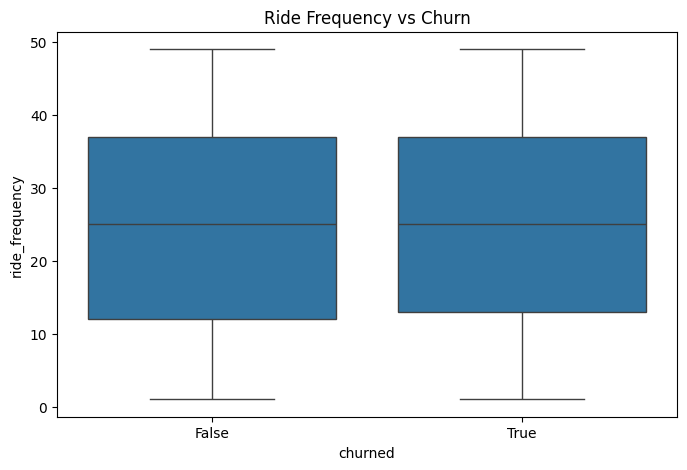

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cr['churned'], y=cr['ride_frequency'])
plt.title("Ride Frequency vs Churn")
plt.show()

In [8]:
# What is the average customer rating for churned vs. non-churned customers?

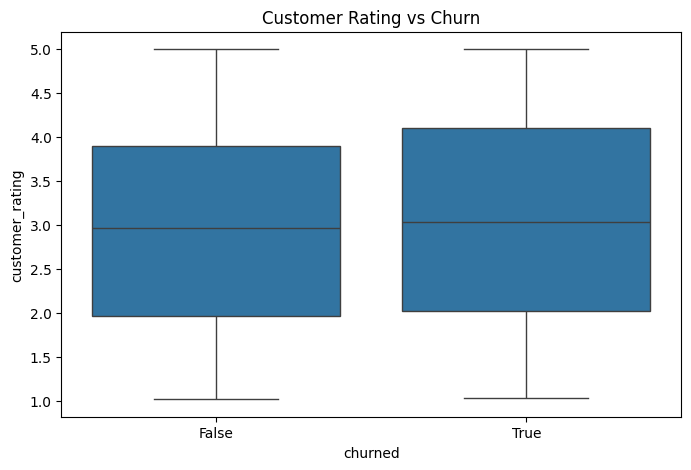

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=cr['churned'], y=cr['customer_rating'])
plt.title("Customer Rating vs Churn")
plt.show()

In [11]:
# How does last ride date distribution differ between churned and non-churned customers?

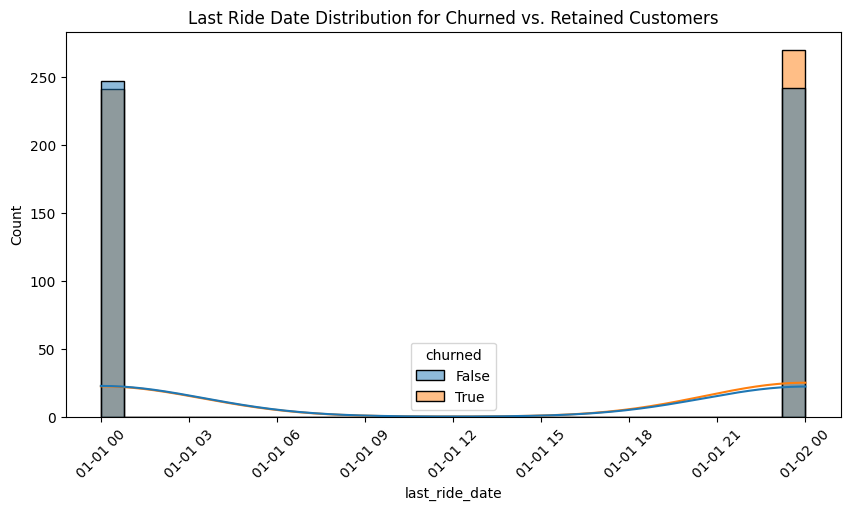

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=cr, x="last_ride_date", hue="churned", kde=True, bins=30)
plt.title("Last Ride Date Distribution for Churned vs. Retained Customers")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Which payment method is most commonly used by churned customers?

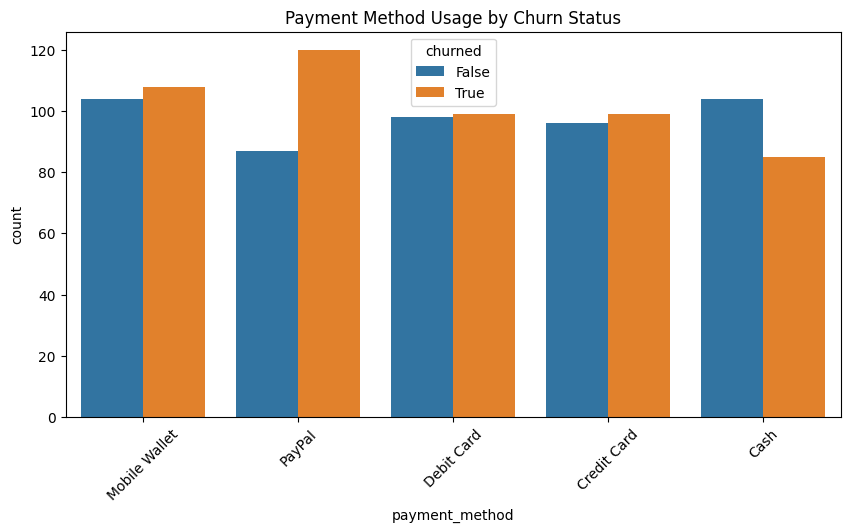

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=cr, x="payment_method", hue="churned", order=cr["payment_method"].value_counts().index)
plt.title("Payment Method Usage by Churn Status")
plt.xticks(rotation=45)
plt.show()

In [16]:
# What is the average ride frequency of customers who use different ride types?

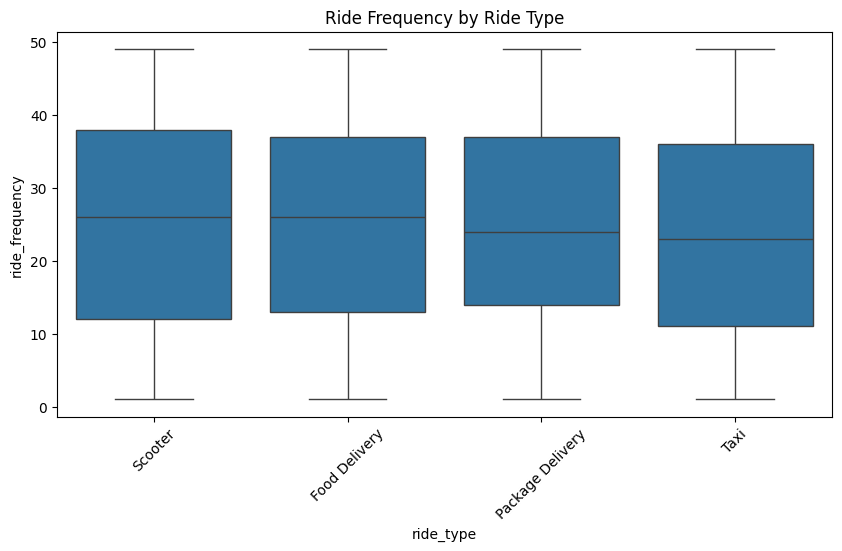

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=cr['ride_type'], y=cr['ride_frequency'])
plt.title("Ride Frequency by Ride Type")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Are there certain ride types that have a higher churn rate?

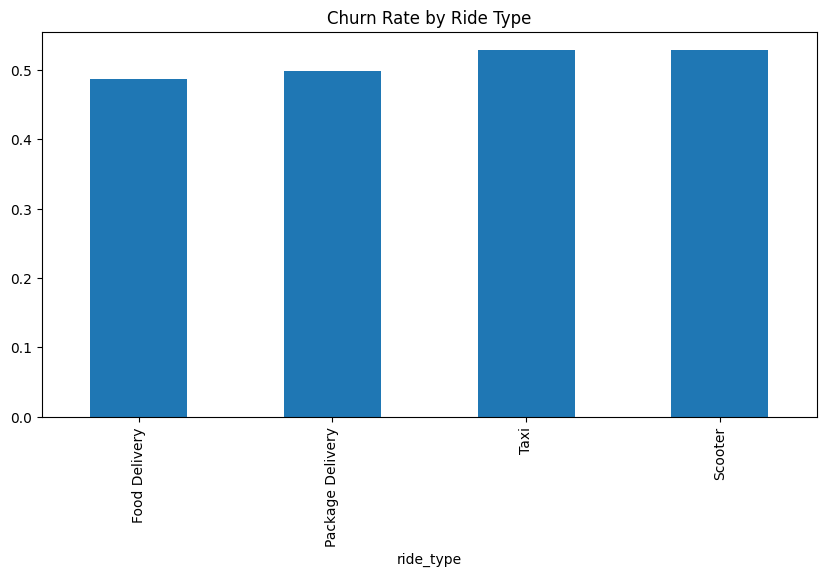

In [20]:
churn_rate_by_ride_type = cr.groupby("ride_type")["churned"].mean().sort_values()
churn_rate_by_ride_type.plot(kind='bar', figsize=(10,5), title="Churn Rate by Ride Type")
plt.show()

In [21]:
#  Is there a trend in customer churn based on inactivity (days since last ride)?

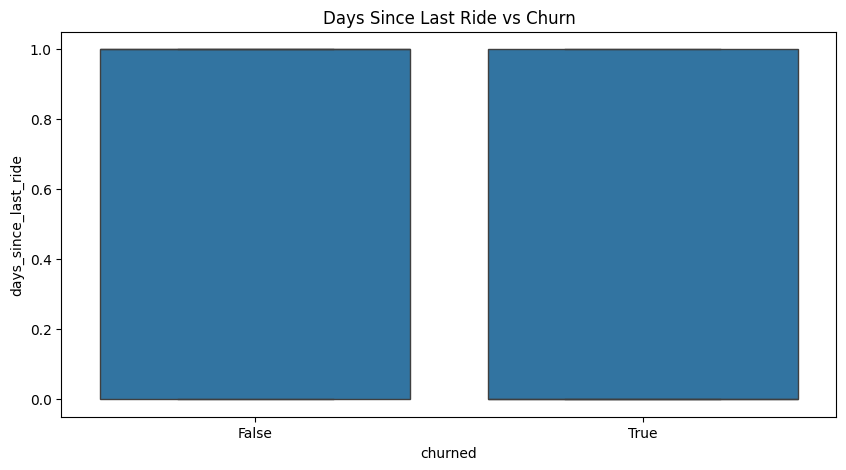

In [22]:
cr['days_since_last_ride'] = (cr['last_ride_date'].max() - cr['last_ride_date']).dt.days
plt.figure(figsize=(10,5))
sns.boxplot(x=cr['churned'], y=cr['days_since_last_ride'])
plt.title("Days Since Last Ride vs Churn")
plt.show()

In [23]:
# What percentage of customers churn after their first few rides?

In [24]:
churned_first_rides = cr[cr['ride_frequency'] <= 5]['churned'].mean()
print(f"Percentage of customers who churn after ≤5 rides: {churned_first_rides * 100:.2f}%")

Percentage of customers who churn after ≤5 rides: 46.36%


In [25]:
# How does churn rate vary based on customer rating?

C:\Users\zisan\AppData\Local\Temp\ipykernel_11248\1888557636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_churn_rate = cr.groupby(pd.cut(cr["customer_rating"], bins=5))["churned"].mean()


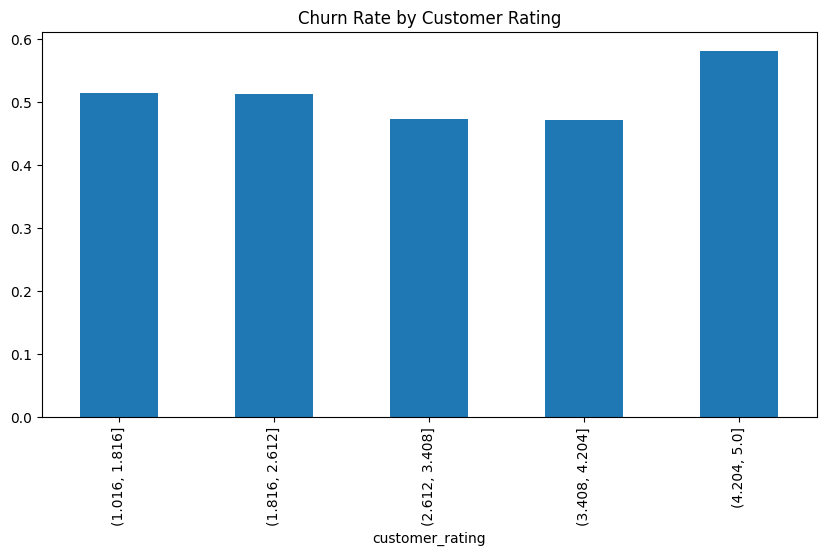

In [26]:
rating_churn_rate = cr.groupby(pd.cut(cr["customer_rating"], bins=5))["churned"].mean()
rating_churn_rate.plot(kind="bar", figsize=(10,5), title="Churn Rate by Customer Rating")
plt.show()

In [30]:
# Is there a significant difference in churn rate based on payment method?

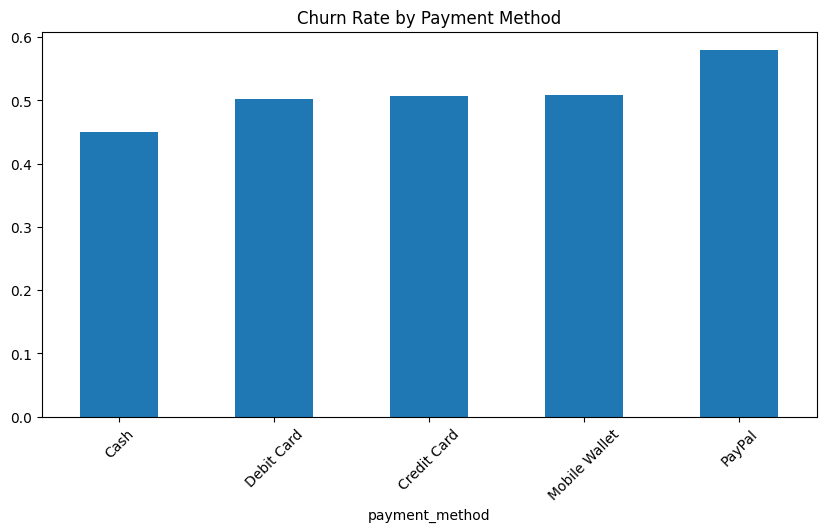

In [31]:
payment_churn_rate = cr.groupby("payment_method")["churned"].mean().sort_values()
payment_churn_rate.plot(kind='bar', figsize=(10,5), title="Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# What is the distribution of payment methods among high-frequency vs. low-frequency customers?

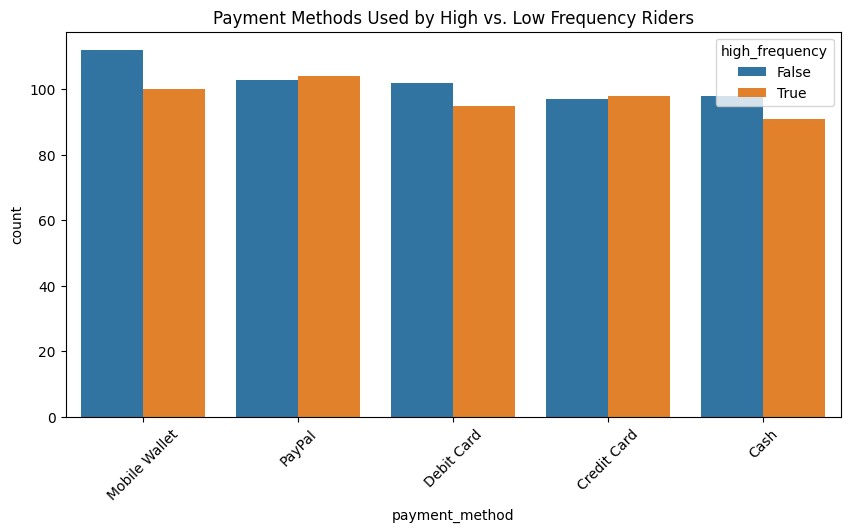

In [32]:
cr['high_frequency'] = cr['ride_frequency'] > cr['ride_frequency'].median()
plt.figure(figsize=(10,5))
sns.countplot(data=cr, x="payment_method", hue="high_frequency", order=cr["payment_method"].value_counts().index)
plt.title("Payment Methods Used by High vs. Low Frequency Riders")
plt.xticks(rotation=45)
plt.show()

In [33]:
#  How does the payment method impact customer retention?

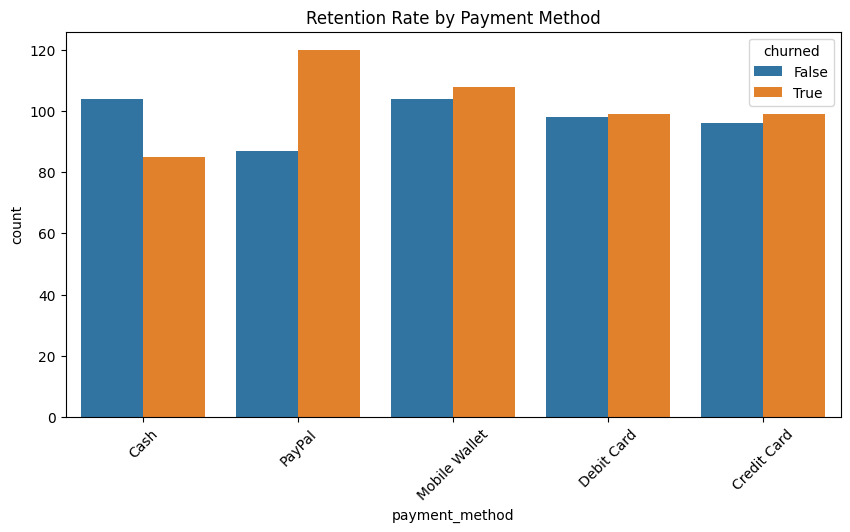

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=cr, x="payment_method", hue="churned")
plt.title("Retention Rate by Payment Method")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Can we segment customers into different groups based on ride frequency, rating, and churn status?

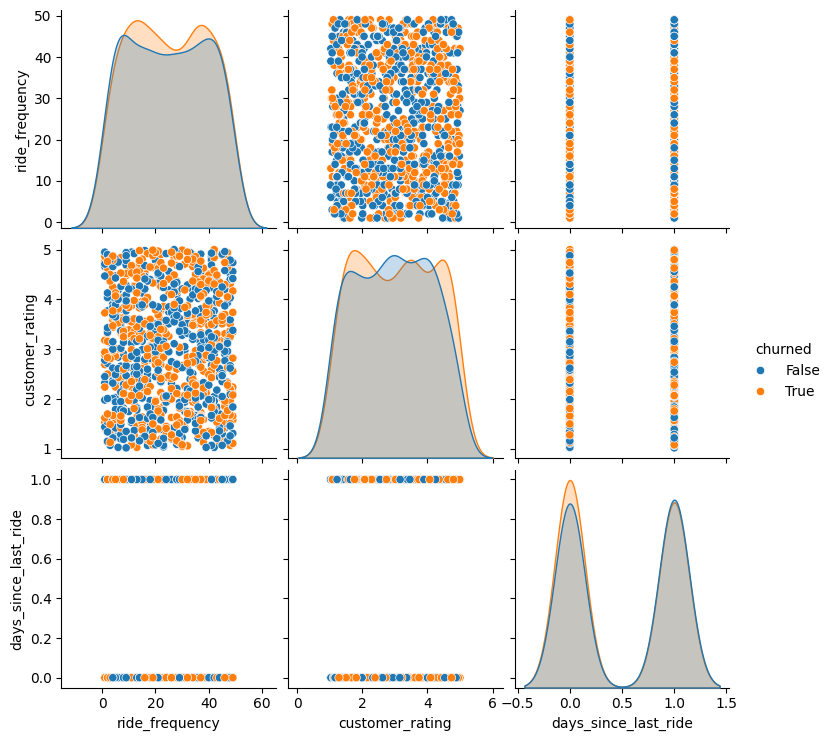

In [35]:
sns.pairplot(cr, hue="churned", vars=["ride_frequency", "customer_rating", "days_since_last_ride"])
plt.show()

In [36]:
# What are the key indicators of loyal customers vs. churned customers?

In [ ]:
loyal_customers = cr[df['churned'] == False]
churned_customers = cr[cr['churned'] == True]

print("Loyal Customers (Avg Stats):\n", loyal_customers[['ride_frequency', 'customer_rating']].mean())
print("\nChurned Customers (Avg Stats):\n", churned_customers[['ride_frequency', 'customer_rating']].mean())